In [1]:
import pandas as pd
import os


os.listdir()

df = pd.read_csv("netflix_titles.csv")

In [2]:

# getting the top rows to skim through the data

new_df = df.head(5)
new_df


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
# seeing how many tv shows and movies were produced in each country or countries


df.groupby(["country", "type"]).count().head(5)

show_id  title  \
country                                            type                      
Argentina                                          Movie         34     34   
                                                   TV Show       16     16   
Argentina, Brazil, France, Poland, Germany, Den... Movie          1      1   
Argentina, Chile                                   Movie          1      1   
Argentina, Chile, Peru                             Movie          1      1   

                                                            director  cast  \
country                                            type                      
Argentina                                          Movie          34    31   
                                                   TV Show         2    15   
Argentina, Brazil, France, Poland, Germany, Den... Movie           1     1   
Argentina, Chile                                   Movie           1     1   
Argentina, Chile, Peru                             Movie           1     1   

                                                            date_added  \
country                                            type                  
Argentina                                          Movie            34   
                                                   TV Show          16   
Argentina, Brazil, France, Poland, Germany, Den... Movie             1   
Argentina, Chile                                   Movie             1   
Argentina, Chile, Peru                             Movie             1   

                                                            release_year  \
country                                            type                    
Argentina                                          Movie              34   
                                                   TV Show            16   
Argentina, Brazil, France, Poland, Germany, Den... Movie               1   
Argentina, Chile                                   Movie               1   
Argentina, Chile, Peru                             Movie               1   

                                                            rating  duration  \
country                                            type                        
Argentina                                          Movie        34        34   
                                                   TV Show      16        16   
Argentina, Brazil, France, Poland, Germany, Den... Movie         1         1   
Argentina, Chile                                   Movie         1         1   
Argentina, Chile, Peru                             Movie         1         1   

                                                            listed_in  \
country                                            type                 
Argentina                                          Movie           34   
                                                   TV Show         16   
Argentina, Brazil, France, Poland, Germany, Den... Movie            1   
Argentina, Chile                                   Movie            1   
Argentina, Chile, Peru                             Movie            1   

                                                            description  
country                                            type                  
Argentina                                          Movie             34  
                                                   TV Show           16  
Argentina, Brazil, France, Poland, Germany, Den... Movie              1  
Argentina, Chile                                   Movie              1  
Argentina, Chile, Peru                             Movie              1

In [4]:
# filtering all rows in which the movie is from Argentina

df2 = df.loc[df["country"] == "Argentina"]

In [5]:
# resetting the index to zero

df2.reset_index(drop=True, inplace=True)

In [6]:
# going to filter all rows in which the movie or tv show is specifically from america

df.loc[df["country"] == "United States"].head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,"March 19, 2020",2019,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...


In [7]:
# drop rows where the cast is Na and the movie is from United States

import re

df3 = df[pd.notnull(df["cast"])]

df3 = df3.loc[df["country"] == "United States"]

df3 = df3.loc[df["cast"].notna()]




In [8]:
# tried to get the rows in which Robert De Niro was in

import re


df4 = df3.loc[df["cast"].str.contains("Robert De Niro", regex=True).fillna(False)]




In [9]:
# getting all the unique values into a list in cast of columns


# This did not work

list1 = df3["cast"].unique().tolist()



In [10]:
# getting roberts, apply each lambda to each column cast value

val = "Robert De Niro"

df5 = df4["cast"].apply(lambda x: any([val in x]))

df4

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2493,s2494,Movie,GoodFellas,Martin Scorsese,"Robert De Niro, Ray Liotta, Joe Pesci, Lorrain...",United States,"January 1, 2021",1990,R,145 min,"Classic Movies, Dramas",Former mobster Henry Hill recounts his colorfu...
3103,s3104,Movie,Jackie Brown,Quentin Tarantino,"Pam Grier, Samuel L. Jackson, Robert Forster, ...",United States,"August 1, 2019",1997,R,154 min,"Dramas, Thrillers",When an aging flight attendant's caught smuggl...
4008,s4009,Movie,Mean Streets,Martin Scorsese,"Robert De Niro, Harvey Keitel, David Proval, A...",United States,"July 1, 2019",1973,R,112 min,"Classic Movies, Dramas, Independent Movies","In New York's Little Italy, a low-level hoodlu..."
5063,s5064,Movie,Raging Bull,Martin Scorsese,"Robert De Niro, Cathy Moriarty, Joe Pesci, Fra...",United States,"October 1, 2019",1980,R,129 min,"Classic Movies, Dramas, Sports Movies",This gritty biopic of brutal boxer Jake LaMott...
5207,s5208,Movie,Righteous Kill,Jon Avnet,"Robert De Niro, Al Pacino, 50 Cent, Carla Gugi...",United States,"June 1, 2019",2008,R,101 min,"Dramas, Thrillers",Two detectives investigate a rash of vigilante...
5610,s5611,Movie,Silver Linings Playbook,David O. Russell,"Bradley Cooper, Jennifer Lawrence, Robert De N...",United States,"March 16, 2020",2012,R,122 min,"Comedies, Dramas, Independent Movies","After a stint in a mental hospital, Pat moves ..."
5994,s5995,Movie,Taxi Driver,Martin Scorsese,"Robert De Niro, Jodie Foster, Cybill Shepherd,...",United States,"April 1, 2020",1976,R,114 min,"Classic Movies, Dramas, Thrillers",Enraged by New York's moral rot and urban deca...
6507,s6508,Movie,The Irishman,Martin Scorsese,"Robert De Niro, Al Pacino, Joe Pesci, Harvey K...",United States,"November 27, 2019",2019,R,209 min,Dramas,Hit man Frank Sheeran looks back at the secret...
6508,s6509,Movie,The Irishman: In Conversation,NaN,"Martin Scorsese, Robert De Niro, Al Pacino, Jo...",United States,"December 5, 2019",2019,TV-MA,24 min,Documentaries,Join director Martin Scorsese as he sits down ...


In [11]:
df3

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,"March 19, 2020",2019,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...
...,...,...,...,...,...,...,...,...,...,...,...,...
7758,s7759,Movie,Zack and Miri Make a Porno,Kevin Smith,"Seth Rogen, Elizabeth Banks, Craig Robinson, J...",United States,"October 1, 2018",2008,R,101 min,"Comedies, Independent Movies, Romantic Movies",Zack and Miri make and star in an adult film t...
7771,s7772,Movie,Zion,Floyd Russ,Zion Clark,United States,"August 10, 2018",2018,TV-PG,12 min,"Documentaries, Sports Movies",Born without legs and stuck in foster care for...
7774,s7775,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
7778,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [12]:
out = df3["cast"].str.split(", ").explode().value_counts()

In [13]:
out = pd.DataFrame({"Name": out.index, "Count": out.values})

In [16]:
df_exp=df3.assign(cast=df3["cast"].str.split(", ")).explode("cast")

In [17]:
df_exp = df_exp.loc[df_exp["cast"].notna()]

In [26]:
out1 = out.head(5)

In [25]:
import matplotlib.pyplot as plt

In [28]:
x = out1["Name"]
y = out1["Count"]

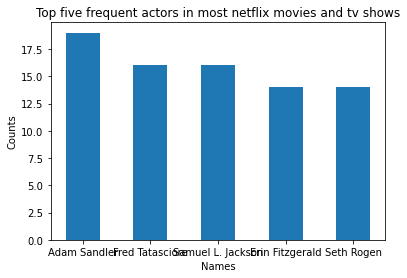

In [33]:
plt.bar(x, y, width=0.5)
plt.xlabel("Names")
plt.ylabel("Counts")
plt.title("Top five frequent actors in most netflix movies and tv shows")
plt.show()